<a href="https://colab.research.google.com/github/hijadelena/call-center-analytics-python-tableau/blob/main/analsis_nulos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

def analizar_llamadas(url):
    """
    Calcula métricas clave para el análisis de llamadas repetidas.
    """

    # 1. Leer dataset desde Google Sheets
    df = pd.read_csv(url)

    # 2. Identificar columnas de contactos
    contacto_cols = [col for col in df.columns if col.startswith('contacts_n')]

    # 3. Total de contactos registrados (celdas NO nulas)
    total_contactos_registrados = df[contacto_cols].notnull().sum().sum()

    # 4. Total de celdas nulas
    total_nulos = df[contacto_cols].isnull().sum().sum()

    # 5. Porcentaje de nulos
    total_celdas = df[contacto_cols].size
    porcentaje_nulos = (total_nulos / total_celdas) * 100

    # 6. Total de llamadas (sumando todos los valores)
    total_llamadas = df[contacto_cols].sum().sum()

    # 7. Total llamadas repetidas (sumando todas excepto contacts_n)
    repetidas_cols = [c for c in contacto_cols if c != 'contacts_n']
    total_llamadas_repetidas = df[repetidas_cols].sum().sum()

    # 8. FCR (%) = % registros sin repetición
    df['total_repeats'] = df[repetidas_cols].sum(axis=1)
    casos_fcr = (df['total_repeats'] == 0).sum()
    fcr_rate = (casos_fcr / len(df)) * 100

    # 9. Ratio de recontacto (%) = llamadas repetidas / total llamadas
    ratio_recontacto = (total_llamadas_repetidas / total_llamadas) * 100 if total_llamadas > 0 else 0

    # 10. Resultados por mercado y problema
    por_mercado = None
    if 'new_market' in df.columns:
        por_mercado = df.groupby('new_market')[contacto_cols].sum().sum(axis=1).sort_values(ascending=False)

    por_problema = None
    if 'new_type' in df.columns:
        por_problema = df.groupby('new_type')[contacto_cols].sum().sum(axis=1).sort_values(ascending=False)

    # 11. Construir resumen
    resumen = {
        "Total Contactos Registrados": int(total_contactos_registrados),
        "Total Celdas Nulas": int(total_nulos),
        "Porcentaje Nulos (%)": round(porcentaje_nulos, 2),
        "Total Llamadas": int(total_llamadas),
        "Total Llamadas Repetidas": int(total_llamadas_repetidas),
        "FCR (%)": round(fcr_rate, 2),
        "Ratio Recontacto (%)": round(ratio_recontacto, 2)
    }

    return resumen, por_mercado, por_problema

# ✅ URLs de tus Google Sheets
url_market1 = 'https://docs.google.com/spreadsheets/d/1T7irtn0ay9MfuhG_6y2jEbeT-zLuEQTbv1qNxkpBaTE/export?format=csv'
url_market2 = 'https://docs.google.com/spreadsheets/d/1RE_MAKPt0JfWijbYCR32XFra9OGlmS2tLMxNs-X2NSU/export?format=csv'

# ✅ Ejecutar análisis para Market 1
print("📌 **Market 1**")
resumen1, mercado1, problema1 = analizar_llamadas(url_market1)
for k, v in resumen1.items():
    print(f"{k}: {v}")

# ✅ Ejecutar análisis para Market 2
print("\n📌 **Market 2**")
resumen2, mercado2, problema2 = analizar_llamadas(url_market2)
for k, v in resumen2.items():
    print(f"{k}: {v}")


📌 **Market 1**
Total Contactos Registrados: 2790
Total Celdas Nulas: 810
Porcentaje Nulos (%): 22.5
Total Llamadas: 57980
Total Llamadas Repetidas: 12647
FCR (%): 7.33
Ratio Recontacto (%): 21.81

📌 **Market 2**
Total Contactos Registrados: 1421
Total Celdas Nulas: 2179
Porcentaje Nulos (%): 60.53
Total Llamadas: 5176
Total Llamadas Repetidas: 787
FCR (%): 48.67
Ratio Recontacto (%): 15.2


✅ 1. Distribución de llamadas repetidas por número de contacto (N1, N2, N3, etc.)
✅ 2. En qué contacto hay más valores nulos (celdas vacías)

Voy a darte un script en Python que hace exactamente esto y devuelve:
✔ Un DataFrame con total de llamadas por contacto
✔ Un DataFrame con total de nulos por contacto
✔ Gráficos que muestran ambas distribuciones (en barras)

📌 Market 1 - Llamadas por contacto:
contacts_n      45333.0
contacts_n_1     3386.0
contacts_n_2     2153.0
contacts_n_3     1689.0
contacts_n_4     1476.0
contacts_n_5     1418.0
contacts_n_6     1256.0
contacts_n_7     1269.0
dtype: float64

📌 Market 1 - Nulos por contacto:
contacts_n       10
contacts_n_1     91
contacts_n_2    100
contacts_n_3    107
contacts_n_4    120
contacts_n_5    128
contacts_n_6    128
contacts_n_7    126
dtype: int64

📌 Market 2 - Llamadas por contacto:
contacts_n      4389.0
contacts_n_1     265.0
contacts_n_2     142.0
contacts_n_3      91.0
contacts_n_4      82.0
contacts_n_5      74.0
contacts_n_6      59.0
contacts_n_7      74.0
dtype: float64

📌 Market 2 - Nulos por contacto:
contacts_n      122
contacts_n_1    237
contacts_n_2    274
contacts_n_3    297
contacts_n_4    312
contacts_n_5    311
contacts_n_6    317
contacts_n_7    309
dtype: int64


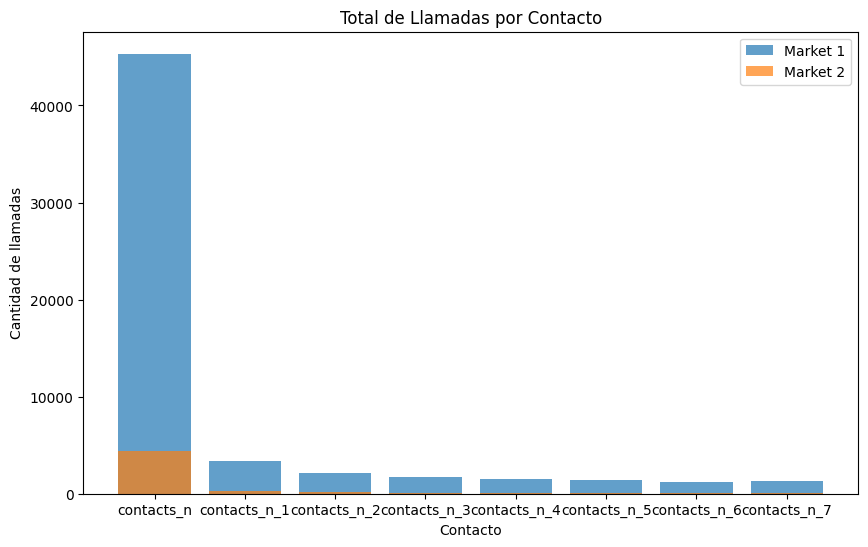

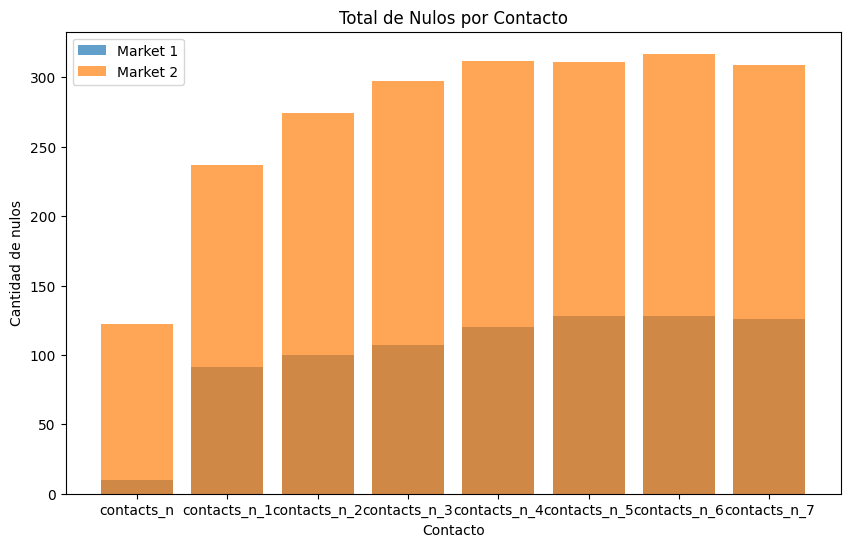

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs de los datasets
url_market1 = 'https://docs.google.com/spreadsheets/d/1T7irtn0ay9MfuhG_6y2jEbeT-zLuEQTbv1qNxkpBaTE/export?format=csv'
url_market2 = 'https://docs.google.com/spreadsheets/d/1RE_MAKPt0JfWijbYCR32XFra9OGlmS2tLMxNs-X2NSU/export?format=csv'

# Cargar datasets
df1 = pd.read_csv(url_market1)
df2 = pd.read_csv(url_market2)

# Normalizar nombres de columnas
df1.columns = df1.columns.str.strip().str.lower()
df2.columns = df2.columns.str.strip().str.lower()

# Identificar columnas de contactos
contact_cols = [col for col in df1.columns if 'contacts' in col]

# Convertir a numérico y manejar nulos
for col in contact_cols:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')
    df2[col] = pd.to_numeric(df2[col], errors='coerce')

# ---- 1. Llamadas por contacto ----
calls_by_contact_m1 = df1[contact_cols].sum().sort_index()
calls_by_contact_m2 = df2[contact_cols].sum().sort_index()

# ---- 2. Nulos por contacto ----
nulls_by_contact_m1 = df1[contact_cols].isnull().sum().sort_index()
nulls_by_contact_m2 = df2[contact_cols].isnull().sum().sort_index()

# Mostrar tablas
print("📌 Market 1 - Llamadas por contacto:")
print(calls_by_contact_m1)
print("\n📌 Market 1 - Nulos por contacto:")
print(nulls_by_contact_m1)

print("\n📌 Market 2 - Llamadas por contacto:")
print(calls_by_contact_m2)
print("\n📌 Market 2 - Nulos por contacto:")
print(nulls_by_contact_m2)

# ---- 3. Graficos ----
plt.figure(figsize=(10, 6))
plt.bar(calls_by_contact_m1.index, calls_by_contact_m1.values, label='Market 1', alpha=0.7)
plt.bar(calls_by_contact_m2.index, calls_by_contact_m2.values, label='Market 2', alpha=0.7)
plt.title('Total de Llamadas por Contacto')
plt.xlabel('Contacto')
plt.ylabel('Cantidad de llamadas')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(nulls_by_contact_m1.index, nulls_by_contact_m1.values, label='Market 1', alpha=0.7)
plt.bar(nulls_by_contact_m2.index, nulls_by_contact_m2.values, label='Market 2', alpha=0.7)
plt.title('Total de Nulos por Contacto')
plt.xlabel('Contacto')
plt.ylabel('Cantidad de nulos')
plt.legend()
plt.show()


✅ Plan del análisis adicional

Mapear los códigos de new_type a nombres descriptivos (Account Manager, Technical, Scheduling, etc.)

Calcular para cada tipo:

Total de llamadas (sumando todos los contactos)

Total de llamadas repetidas (contacts_n_1 en adelante)

Total de nulos

Identificar:

¿Cuál tipo tiene más llamadas repetidas?

¿Cuál tipo tiene más nulos?

Generar:

Una tabla resumen

Un gráfico comparativo para llamadas repetidas y nulos por tipo

Conclusión automática: qué significa para la operación.

📌 Resumen por tipo de problema:
      problem_type  total_calls  total_repeats  nulls
0  Account Manager       3696.0          902.0      5
1     Construction        407.0          103.0   1243
2    Internet/WiFi      25897.0         6365.0    395
3       Scheduling       2145.0          715.0    905
4        Technical      31011.0         5349.0    441


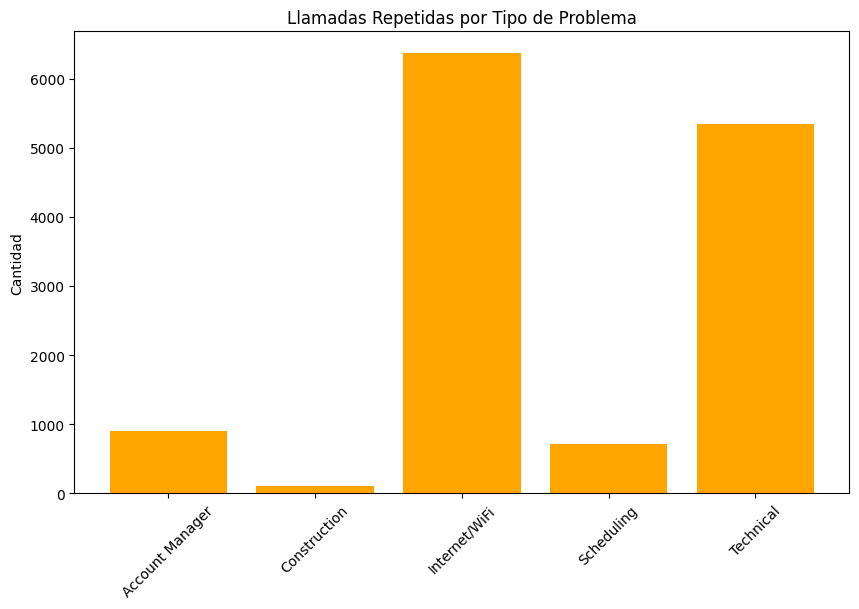

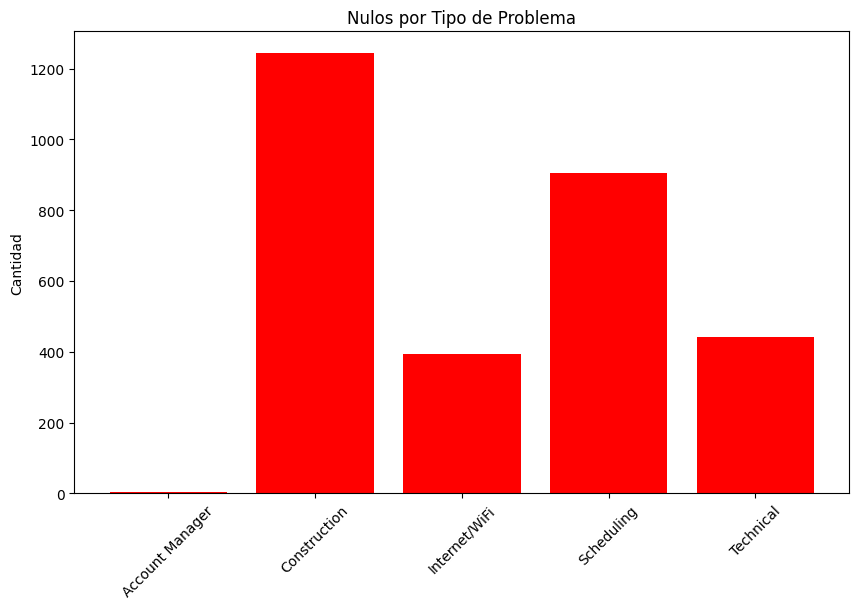

✅ El problema con MÁS llamadas repetidas es: Internet/WiFi
✅ El problema con MÁS nulos en registros es: Construction


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs
url_market1 = 'https://docs.google.com/spreadsheets/d/1T7irtn0ay9MfuhG_6y2jEbeT-zLuEQTbv1qNxkpBaTE/export?format=csv'
url_market2 = 'https://docs.google.com/spreadsheets/d/1RE_MAKPt0JfWijbYCR32XFra9OGlmS2tLMxNs-X2NSU/export?format=csv'

# Cargar datos
df1 = pd.read_csv(url_market1)
df2 = pd.read_csv(url_market2)

# Normalizar nombres
df1.columns = df1.columns.str.strip().str.lower()
df2.columns = df2.columns.str.strip().str.lower()

# Unir datasets
df = pd.concat([df1, df2], ignore_index=True)

# Identificar columnas de contactos
contact_cols = [col for col in df.columns if 'contacts' in col]

# Convertir a numérico
for col in contact_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Mapear tipos
type_mapping = {
    'type_1': 'Account Manager',
    'type_2': 'Technical',
    'type_3': 'Scheduling',
    'type_4': 'Construction',
    'type_5': 'Internet/WiFi'
}
df['problem_type'] = df['new_type'].map(type_mapping)

# Calcular métricas por fila
repeat_cols = [c for c in contact_cols if '_n_' in c and c != 'contacts_n']
df['total_calls'] = df[contact_cols].sum(axis=1)
df['total_repeats'] = df[repeat_cols].sum(axis=1)
df['nulls'] = df[contact_cols].isnull().sum(axis=1)

# Agrupar por tipo de problema
summary = df.groupby('problem_type').agg(
    total_calls=('total_calls', 'sum'),
    total_repeats=('total_repeats', 'sum'),
    nulls=('nulls', 'sum')
).reset_index()

print("📌 Resumen por tipo de problema:")
print(summary)

# Graficos
plt.figure(figsize=(10,6))
plt.bar(summary['problem_type'], summary['total_repeats'], color='orange')
plt.title('Llamadas Repetidas por Tipo de Problema')
plt.xticks(rotation=45)
plt.ylabel('Cantidad')
plt.show()

plt.figure(figsize=(10,6))
plt.bar(summary['problem_type'], summary['nulls'], color='red')
plt.title('Nulos por Tipo de Problema')
plt.xticks(rotation=45)
plt.ylabel('Cantidad')
plt.show()

# Insight automático
max_repeats = summary.loc[summary['total_repeats'].idxmax(), 'problem_type']
max_nulls = summary.loc[summary['nulls'].idxmax(), 'problem_type']

print(f"✅ El problema con MÁS llamadas repetidas es: {max_repeats}")
print(f"✅ El problema con MÁS nulos en registros es: {max_nulls}")



📌 Resumen por mercado y tipo de problema:
     market     problem_type  total_calls  total_repeats  nulls  \
0  Market 1  Account Manager       3354.0          850.0      0   
1  Market 1     Construction        379.0           95.0    549   
2  Market 1    Internet/WiFi      23496.0         5969.0      5   
3  Market 1       Scheduling       2044.0          691.0    253   
4  Market 1        Technical      28707.0         5042.0      3   
5  Market 2  Account Manager        342.0           52.0      5   
6  Market 2     Construction         28.0            8.0    694   
7  Market 2    Internet/WiFi       2401.0          396.0    390   
8  Market 2       Scheduling        101.0           24.0    652   
9  Market 2        Technical       2304.0          307.0    438   

   repeat_ratio_%  null_ratio_%  
0       25.342874      0.000000  
1       25.065963     18.106860  
2       25.404324      0.002660  
3       33.806262      1.547211  
4       17.563660      0.001306  
5       15.20467

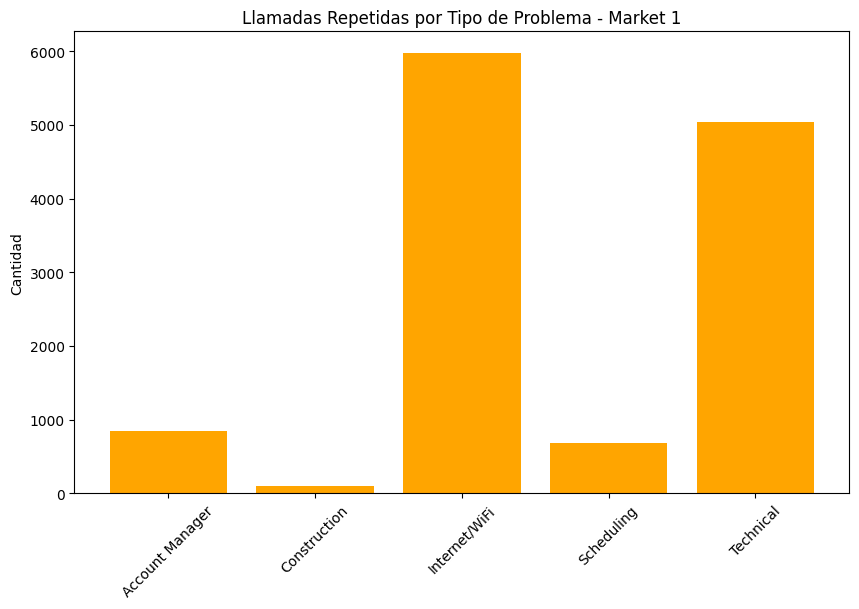

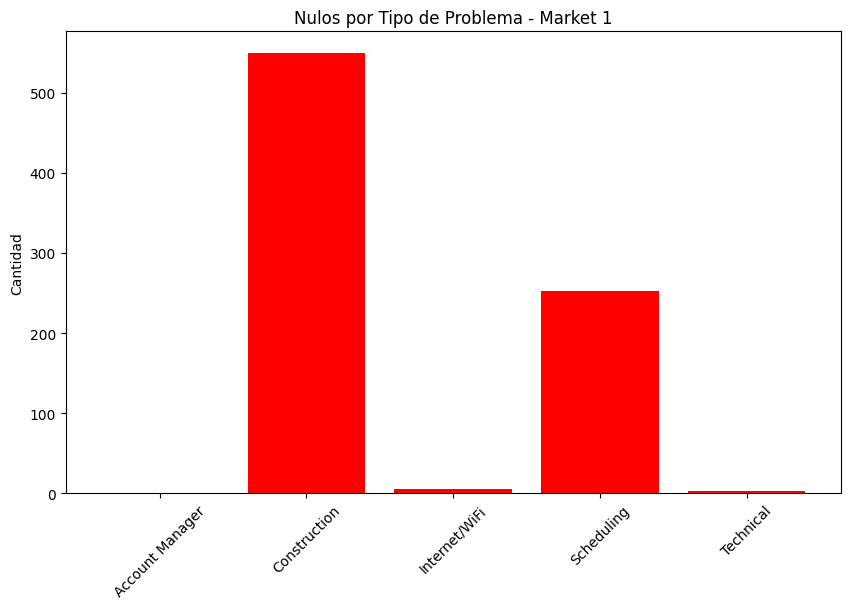

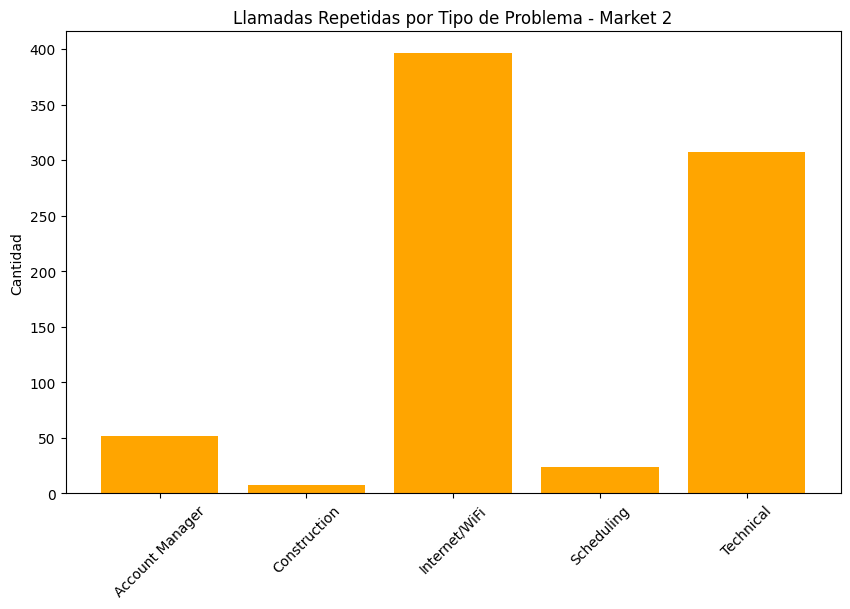

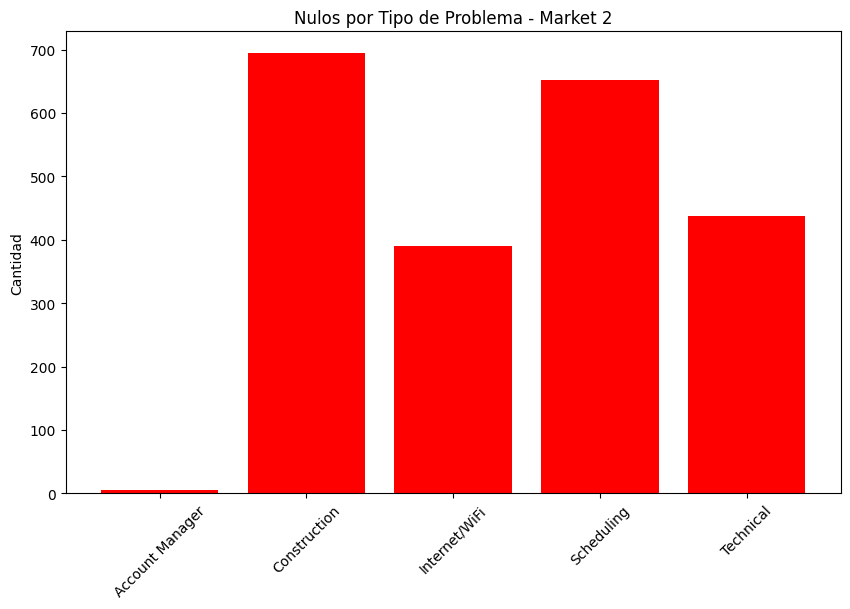

✅ Market 1: más repetidas → Internet/WiFi, más nulos → Construction
✅ Market 2: más repetidas → Internet/WiFi, más nulos → Construction


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs
url_market1 = 'https://docs.google.com/spreadsheets/d/1T7irtn0ay9MfuhG_6y2jEbeT-zLuEQTbv1qNxkpBaTE/export?format=csv'
url_market2 = 'https://docs.google.com/spreadsheets/d/1RE_MAKPt0JfWijbYCR32XFra9OGlmS2tLMxNs-X2NSU/export?format=csv'

# Cargar datos
df1 = pd.read_csv(url_market1)
df2 = pd.read_csv(url_market2)

# Normalizar nombres
df1.columns = df1.columns.str.strip().str.lower()
df2.columns = df2.columns.str.strip().str.lower()

# Agregar columna de mercado
df1['market'] = 'Market 1'
df2['market'] = 'Market 2'

# Unir datasets
df = pd.concat([df1, df2], ignore_index=True)

# Identificar columnas de contactos
contact_cols = [col for col in df.columns if 'contacts' in col]

# Convertir a numérico
for col in contact_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Mapear tipos
type_mapping = {
    'type_1': 'Account Manager',
    'type_2': 'Technical',
    'type_3': 'Scheduling',
    'type_4': 'Construction',
    'type_5': 'Internet/WiFi'
}
df['problem_type'] = df['new_type'].map(type_mapping)

# Calcular métricas por fila
repeat_cols = [c for c in contact_cols if '_n_' in c and c != 'contacts_n']
df['total_calls'] = df[contact_cols].sum(axis=1)
df['total_repeats'] = df[repeat_cols].sum(axis=1)
df['nulls'] = df[contact_cols].isnull().sum(axis=1)

# Agrupar por mercado y tipo de problema
summary = df.groupby(['market','problem_type']).agg(
    total_calls=('total_calls', 'sum'),
    total_repeats=('total_repeats', 'sum'),
    nulls=('nulls', 'sum')
).reset_index()

# Calcular ratios
summary['repeat_ratio_%'] = (summary['total_repeats'] / summary['total_calls']) * 100
summary['null_ratio_%'] = (summary['nulls'] / (len(contact_cols) * summary['total_calls'])) * 100  # aproximado

print("📌 Resumen por mercado y tipo de problema:")
print(summary)

# Graficos por mercado
for market in summary['market'].unique():
    subset = summary[summary['market'] == market]

    plt.figure(figsize=(10,6))
    plt.bar(subset['problem_type'], subset['total_repeats'], color='orange')
    plt.title(f'Llamadas Repetidas por Tipo de Problema - {market}')
    plt.xticks(rotation=45)
    plt.ylabel('Cantidad')
    plt.show()

    plt.figure(figsize=(10,6))
    plt.bar(subset['problem_type'], subset['nulls'], color='red')
    plt.title(f'Nulos por Tipo de Problema - {market}')
    plt.xticks(rotation=45)
    plt.ylabel('Cantidad')
    plt.show()

# Insights automáticos por mercado
for market in summary['market'].unique():
    subset = summary[summary['market'] == market]
    max_repeats = subset.loc[subset['total_repeats'].idxmax(), 'problem_type']
    max_nulls = subset.loc[subset['nulls'].idxmax(), 'problem_type']
    print(f"✅ {market}: más repetidas → {max_repeats}, más nulos → {max_nulls}")
